Hunter Bennett | Glass Lab | Kupffer Strains Project | February 24 2021  

This notebook is for making fancier figure level plots describing differential gene expression for the strains NASH paper. It generates the following plots:
1. Differential scatter plot similar to those make in Link et al. 2018 showing differential peaks at fc > 2 and fc > 4.

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
### imports ###
import sys
%matplotlib inline
import os
import re
import glob
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 300
sns.set(font_scale=1)
sns.set_context('talk')
sns.set_style('ticks')
# get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# import custom functions
import sys
sys.path.insert(0, '/home/h1bennet/code/')
from hbUtils import ngs_qc, quantile_normalize_df
from plotting_scripts import label_point, pca_rpkm_mat, get_diff_volcano
from homer_preprocessing import read_annotated_peaks, import_homer_diffgene, pull_comparisons_get_diff

In [2]:
dataDirectory = ''
workingDirectory = '/home/h1bennet/strains_rna/results/A00_Strains_Control_WholeLiver_RNA/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

# Make folder for "fancy figures" for manuscript

In [3]:
if not os.path.isdir('./fancy_figures/'):
    os.mkdir('./fancy_figures/')

### Import differential peaks

In [4]:
diff, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
    './differential/aj_hepatocyte_control_young.vs.balbc_hepatocyte_control_young.scatter.homer.txt',
    './expression/HOMER.rawTPM.txt')

ge all transcripts (24940, 43)
Diff Gene selected transcripts (5501, 14)
ge selected transcripts (5501, 43)


In [5]:
comps = ['aj_hepatocyte_control_young.vs.balbc_hepatocyte_control_young.scatter.homer.txt',
         'aj_hepatocyte_control_young.vs.c57_hepatocyte_control_young.scatter.homer.txt'
         'balbc_hepatocyte_control_young.vs.c57_hepatocyte_control_young.scatter.homer.txt'
         'aj_lsec_control_young.vs.balbc_lsec_control_young.scatter.homer.txt',
         'aj_lsec_control_young.vs.c57_lsec_control_young.scatter.homer.txt'
         'balbc_lsec_control_young.vs.c57_lsec_control_young.scatter.homer.txt'
         'aj_stellate_control_young.vs.balbc_stellate_control_young.scatter.homer.txt',
         'aj_stellate_control_young.vs.c57_stellate_control_young.scatter.homer.txt'
         'balbc_stellate_control_young.vs.c57_stellate_control_young.scatter.homer.txt']

ids = [['AJ.*Hep'], ['BALB.*Hep'],
       ['AJ.*Hep'], ['C57.*Hep'],
       ['BALB.*Hep'], ['C57.*Hep'],
       ['AJ.*LSEC'], ['BALB.*LSEC'],
       ['AJ.*LSEC'], ['C57.*LSEC'],
       ['BALB.*LSEC'], ['C57.*LSEC'],
       ['AJ.*Stellate'], ['BALB.*Stellate'],
       ['AJ.*Stellate'], ['C57.*Stellate'],
       ['BALB.*Stellate'], ['C57.*Stellate']]

# Set parameters that don't change throughout plotting

In [17]:
comps = ['aj_hepatocyte_control_young.vs.balbc_hepatocyte_control_young.scatter.homer.txt',
         'aj_hepatocyte_control_young.vs.c57_hepatocyte_control_young.scatter.homer.txt',
         'balbc_hepatocyte_control_young.vs.c57_hepatocyte_control_young.scatter.homer.txt',
         'aj_lsec_control_young.vs.balbc_lsec_control_young.scatter.homer.txt',
         'aj_lsec_control_young.vs.c57_lsec_control_young.scatter.homer.txt',
         'balbc_lsec_control_young.vs.c57_lsec_control_young.scatter.homer.txt',
         'aj_stellate_control_young.vs.balbc_stellate_control_young.scatter.homer.txt',
         'aj_stellate_control_young.vs.c57_stellate_control_young.scatter.homer.txt',
         'balbc_stellate_control_young.vs.c57_stellate_control_young.scatter.homer.txt']

ids = [['AJ.*Hep', 'BALB.*Hep'],
       ['AJ.*Hep', 'C57.*Hep'],
       ['BALB.*Hep', 'C57.*Hep'],
       ['AJ.*LSEC', 'BALB.*LSEC'],
       ['AJ.*LSEC', 'C57.*LSEC'],
       ['BALB.*LSEC', 'C57.*LSEC'],
       ['AJ.*Stellate', 'BALB.*Stellate'],
       ['AJ.*Stellate', 'C57.*Stellate'],
       ['BALB.*Stellate', 'C57.*Stellate']]

labels = [['AJ', 'BALB/cJ'],
          ['AJ', 'C57BL/6J'],
          ['BALB/cJ', 'C57BL/6J'],
          ['AJ', 'BALB/cJ'],
          ['AJ', 'C57BL/6J'],
          ['BALB/cJ', 'C57BL/6J'],
          ['AJ', 'BALB/cJ'],
          ['AJ', 'C57BL/6J'],
          ['BALB/cJ', 'C57BL/6J']]

colors = [['#636363', '#de2d26'],
          ['#636363', '#de2d26'],
          ['#636363', '#de2d26'],
          ['#636363', '#de2d26'],
          ['#636363', '#de2d26'],
          ['#636363', '#de2d26'],
          ['#636363', '#de2d26'],
          ['#636363', '#de2d26'],
          ['#636363', '#de2d26']]

# set plotting thresholds
pthresh = 0.05
fontsize=10
labelsize=8
lfcthresh = (1,2)
dotsize = 0.5
ax_max = 16
n_yticks = 5
ytickstep = 3
color = '#636363'
filename='kupffer_niche_rna_scatter_label_small.png'

aj_hepatocyte_control_young.vs.balbc_hepatocyte_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (5501, 14)
ge selected transcripts (5501, 43)
4484 peaks
110 peaks up in group 1
159 peaks up in group 2
aj_hepatocyte_control_young.vs.c57_hepatocyte_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (5494, 14)
ge selected transcripts (5494, 43)
5017 peaks
101 peaks up in group 1
76 peaks up in group 2
balbc_hepatocyte_control_young.vs.c57_hepatocyte_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (5650, 14)
ge selected transcripts (5650, 43)
4048 peaks
247 peaks up in group 1
185 peaks up in group 2
aj_lsec_control_young.vs.balbc_lsec_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (8926, 14)
ge selected transcripts (8926, 43)
7151 peaks
89 peaks up in group 1
85 peaks up in group 2
aj_lsec_control_young.vs.c57

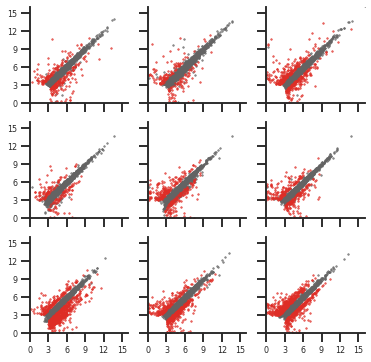

In [18]:
fig, axs = plt.subplots(3,3,
                        figsize=(6,6),
                        sharex=True,
                        sharey=True)
plt.subplots_adjust(wspace=0.2,
                    hspace=0.2)

# set count for labeling axes
count=0

for comp, grep, labs, color, ax in zip(comps, ids, labels, colors, axs.reshape(-1)):
    print(comp)
    de, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        './differential/'+comp,
        './expression/HOMER.rawTPM.txt',
        gene_name_index=True)
    
    # extract columns
    g0 = tpm_mat.columns.str.contains(grep[0])
    g1 = tpm_mat.columns.str.contains(grep[1])
    col = g0 | g1
    
    de['logtpm'] = np.log2(tpm_mat.loc[:, col].mean(1)+1)
    de['log10p'] = -np.log10(de.padj + 10**(-50))
    de['g0_mean'] = np.log2(tpm_mat.loc[:, g0].mean(1)+1)
    de['g1_mean'] = np.log2(tpm_mat.loc[:, g1].mean(1)+1)
       
    # plot group by group scatter:
    de_nonsig = de.reindex(de.index[de.padj >= pthresh])
    de_sig_fc1 = de.reindex(de.index[(de.padj < pthresh) & (np.abs(de.log2FoldChange) >= lfcthresh[0])])
    
    # check number of peaks in each group
    print(de_nonsig.shape[0], 'peaks')
    print((de_sig_fc1.log2FoldChange > lfcthresh[0]).sum(), 'peaks up in group 1')
    print((de_sig_fc1.log2FoldChange < -lfcthresh[0]).sum(), 'peaks up in group 2')
    
    for df, c in zip([de_nonsig, de_sig_fc1],
                     color):
        ax.scatter(
            x=df.g0_mean,
            y=df.g1_mean,
            c=c,
            s=dotsize,
            #rasterized=True
        )
     
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    

    # ax.set_xlabel(labs[0])
    # ax.set_ylabel(labs[1])
    
    #set max and min
    ax.set_xlim([0,ax_max])
    ax.set_ylim([0,ax_max])
    
    # set ticks
    ax.set_xticks(np.arange(0,ax_max,ytickstep))
    ax.set_xticklabels(np.arange(0,ax_max,ytickstep),
                       fontdict={'fontsize':labelsize})
    ax.set_yticks(np.arange(0,ax_max,ytickstep))
    ax.set_yticklabels(np.arange(0,ax_max,ytickstep),
                       fontdict={'fontsize':labelsize})
    
    count = count + 1
# plt.savefig('./fancy_figures/'+filename, bbox_inches='tight')

# Plot with cell type going down the column

In [19]:
reorder = [0,3,6,1,4,7,2,5,8]
new_comps = [comps[i] for i in reorder]
new_ids = [ids[i] for i in reorder]
new_labels = [labels[i] for i in reorder]
filename='kupffer_niche_rna_scatter_nolabel_small_cellcols.png'

aj_hepatocyte_control_young.vs.balbc_hepatocyte_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (5501, 14)
ge selected transcripts (5501, 43)
4484 peaks
110 peaks up in group 1
159 peaks up in group 2
aj_lsec_control_young.vs.balbc_lsec_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (8926, 14)
ge selected transcripts (8926, 43)
7151 peaks
89 peaks up in group 1
85 peaks up in group 2
aj_stellate_control_young.vs.balbc_stellate_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (9336, 14)
ge selected transcripts (9336, 43)
6010 peaks
182 peaks up in group 1
526 peaks up in group 2
aj_hepatocyte_control_young.vs.c57_hepatocyte_control_young.scatter.homer.txt
ge all transcripts (24940, 43)
Diff Gene selected transcripts (5494, 14)
ge selected transcripts (5494, 43)
5017 peaks
101 peaks up in group 1
76 peaks up in group 2
aj_lsec_control_young.vs.c57_lsec

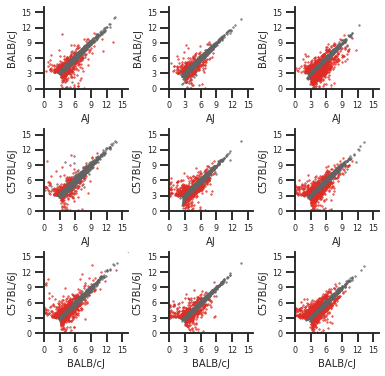

In [28]:
fig, axs = plt.subplots(3,3,
                        figsize=(6,6))
                        # sharex=True,
                        # sharey=True)
plt.subplots_adjust(wspace=0.5,
                    hspace=0.5)

for comp, grep, labs, color, ax in zip(new_comps, new_ids, new_labels, colors, axs.reshape(-1)):
    print(comp)
    de, tpm, tpm_mat, tpm_mat_quant = import_homer_diffgene(
        './differential/'+comp,
        './expression/HOMER.rawTPM.txt',
        gene_name_index=True)
    
    # extract columns
    g0 = tpm_mat.columns.str.contains(grep[0])
    g1 = tpm_mat.columns.str.contains(grep[1])
    col = g0 | g1
    
    de['logtpm'] = np.log2(tpm_mat.loc[:, col].mean(1)+1)
    de['log10p'] = -np.log10(de.padj + 10**(-50))
    de['g0_mean'] = np.log2(tpm_mat.loc[:, g0].mean(1)+1)
    de['g1_mean'] = np.log2(tpm_mat.loc[:, g1].mean(1)+1)
       
    # plot group by group scatter:
    de_nonsig = de.reindex(de.index[de.padj >= pthresh])
    de_sig_fc1 = de.reindex(de.index[(de.padj < pthresh) & (np.abs(de.log2FoldChange) >= lfcthresh[0])])
    
    # check number of peaks in each group
    print(de_nonsig.shape[0], 'peaks')
    print((de_sig_fc1.log2FoldChange > lfcthresh[0]).sum(), 'peaks up in group 1')
    print((de_sig_fc1.log2FoldChange < -lfcthresh[0]).sum(), 'peaks up in group 2')
    
    for df, c in zip([de_nonsig, de_sig_fc1],
                     color):
        ax.scatter(
            x=df.g0_mean,
            y=df.g1_mean,
            c=c,
            s=dotsize,
            #rasterized=True
        )
     
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    #set max and min
    ax.set_xlim([0,ax_max])
    ax.set_ylim([0,ax_max])
    
    # set ticks
    ax.set_xticks(np.arange(0,ax_max,ytickstep))
    ax.set_xticklabels(np.arange(0,ax_max,ytickstep),
                       fontdict={'fontsize':labelsize})
    ax.set_yticks(np.arange(0,ax_max,ytickstep))
    ax.set_yticklabels(np.arange(0,ax_max,ytickstep),
                       fontdict={'fontsize':labelsize})
    
    # set axis labels
    ax.set_xlabel(labs[0], fontsize=fontsize)
    ax.set_ylabel(labs[1], fontsize=fontsize)
plt.savefig('./fancy_figures/'+filename, bbox_inches='tight')

# Strain specific coloring

In [8]:
colors = [['#636363', '#6baed6', '#3182bd', '#74c476', '#31a354'],
          ['#636363', '#fb6a4a', '#de2d26', '#74c476', '#31a354'],
          ['#636363', '#fb6a4a', '#de2d26', '#6baed6', '#3182bd']]

filename='h3k27ac_diffpeak_scatter_twothresh_sixcolor.pdf'

NameError: name 'cols' is not defined

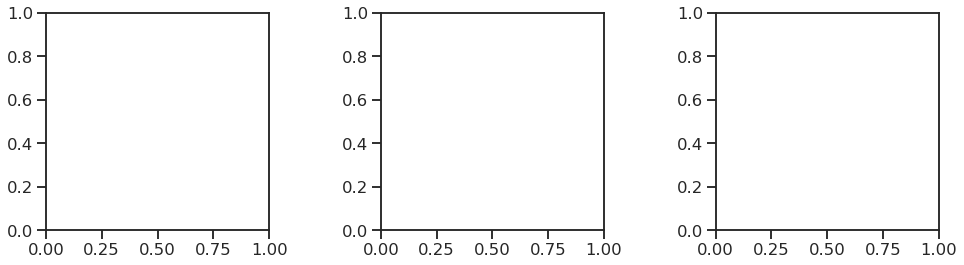

In [30]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
plt.subplots_adjust(wspace=0.5)

for key, col, group, labs, color, ax in zip(comps, cols, groups, labels, colors, axs.reshape(-1)):
    
    de = comp_dict[key]
    de['logtpm'] = np.log2(peak_mat.iloc[:, col].mean(1)+1)
    de['log10p'] = -np.log10(de.adj_pval + 10**(-50))
    de['g0_mean'] = np.log2(peak_mat.iloc[:, group[0]].mean(1)+1)
    de['g1_mean'] = np.log2(peak_mat.iloc[:, group[1]].mean(1)+1)
    
    # plot group by group scatter:
    de_nonsig = de.reindex(de.index[de.adj_pval >= pthresh])
    de_sig_up_fc1 = de.reindex(de.index[(de.adj_pval < pthresh) & (de.log2fc >= lfcthresh[0])])
    de_sig_up_fc2 = de.reindex(de.index[(de.adj_pval < pthresh) & (de.log2fc >= lfcthresh[1])])
    de_sig_dn_fc1 = de.reindex(de.index[(de.adj_pval < pthresh) & (de.log2fc <= -lfcthresh[0])])
    de_sig_dn_fc2 = de.reindex(de.index[(de.adj_pval < pthresh) & (de.log2fc <= -lfcthresh[1])])
    
    for df, c, in zip([de_nonsig, de_sig_up_fc1, de_sig_up_fc2, de_sig_dn_fc1, de_sig_dn_fc2],
                      color):
        ax.scatter(
            x=df.g0_mean,
            y=df.g1_mean,
            c=c,
            s=dotsize)
    
    # set axis labels
    ax.set_xlabel(labs[0])
    ax.set_ylabel(labs[1])
    
    #set max and min
    ax.set_xlim([0,ax_max])
    ax.set_ylim([0,ax_max])
    
    # set ticks
    ax.set_xticks(np.arange(0,ax_max,ytickstep))
    ax.set_xticklabels(np.arange(0,ax_max,ytickstep))
    ax.set_yticks(np.arange(0,ax_max,ytickstep))
    ax.set_yticklabels(np.arange(0,ax_max,ytickstep))
    
# plt.savefig('./fancy_figures/'+filename, bbox_inches='tight')
# plt.close()

# Non-specific coloring

In [10]:
colors = [['#636363', '#fb6a4a', '#de2d26'],
          ['#636363', '#fb6a4a', '#de2d26'],
          ['#636363', '#fb6a4a', '#de2d26']]
    
filename='h3k27ac_diffpeak_scatter_twothresh_twocolor.pdf'

In [11]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
plt.subplots_adjust(wspace=0.5)

for key, col, group, labs, color, ax in zip(comps, cols, groups, labels, colors, axs.reshape(-1)):
    
    de = comp_dict[key]
    de['logtpm'] = np.log2(peak_mat.iloc[:, col].mean(1)+1)
    de['log10p'] = -np.log10(de.adj_pval + 10**(-50))
    de['g0_mean'] = np.log2(peak_mat.iloc[:, group[0]].mean(1)+1)
    de['g1_mean'] = np.log2(peak_mat.iloc[:, group[1]].mean(1)+1)
       
    # plot group by group scatter:
    de_nonsig = de.reindex(de.index[de.adj_pval >= pthresh])
    de_sig_fc1 = de.reindex(de.index[(de.adj_pval < pthresh) & (np.abs(de.log2fc) >= lfcthresh[0])])
    de_sig_fc2 = de.reindex(de.index[(de.adj_pval < pthresh) & (np.abs(de.log2fc) >= lfcthresh[1])])
    
    for df, c in zip([de_nonsig, de_sig_fc1, de_sig_fc2],
                     color):
        ax.scatter(
            x=df.g0_mean,
            y=df.g1_mean,
            c=c,
            s=dotsize)
     
    # set axis labels
    ax.set_xlabel(labs[0])
    ax.set_ylabel(labs[1])
    
    #set max and min
    ax.set_xlim([0,ax_max])
    ax.set_ylim([0,ax_max])
    
    # set ticks
    ax.set_xticks(np.arange(0,ax_max,ytickstep))
    ax.set_xticklabels(np.arange(0,ax_max,ytickstep))
    ax.set_yticks(np.arange(0,ax_max,ytickstep))
    ax.set_yticklabels(np.arange(0,ax_max,ytickstep))
    
    
plt.savefig('./fancy_figures/'+filename, bbox_inches='tight')
plt.close()

# One logfc threshold

In [12]:
colors = [['#636363', '#de2d26'],
          ['#636363', '#de2d26'],
          ['#636363', '#de2d26']]

filename='h3k27ac_diffpeak_scatter_onethresh_onecolor.pdf'

In [13]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
plt.subplots_adjust(wspace=0.5)

for key, col, group, labs, color, ax in zip(comps, cols, groups, labels, colors, axs.reshape(-1)):

    
    de = comp_dict[key]
    de['logtpm'] = np.log2(peak_mat.iloc[:, col].mean(1)+1)
    de['log10p'] = -np.log10(de.adj_pval + 10**(-50))
    de['g0_mean'] = np.log2(peak_mat.iloc[:, group[0]].mean(1)+1)
    de['g1_mean'] = np.log2(peak_mat.iloc[:, group[1]].mean(1)+1)
       
    # plot group by group scatter:
    de_nonsig = de.reindex(de.index[de.adj_pval >= pthresh])
    de_sig_fc1 = de.reindex(de.index[(de.adj_pval < pthresh) & (np.abs(de.log2fc) >= lfcthresh[0])])
    
    for df, c in zip([de_nonsig, de_sig_fc1],
                     color):
        ax.scatter(
            x=df.g0_mean,
            y=df.g1_mean,
            c=c,
            s=dotsize)
     
    # set axis labels
    ax.set_xlabel(labs[0])
    ax.set_ylabel(labs[1])
    
    #set max and min
    ax.set_xlim([0,ax_max])
    ax.set_ylim([0,ax_max])
    
    # set ticks
    ax.set_xticks(np.arange(0,ax_max,ytickstep))
    ax.set_xticklabels(np.arange(0,ax_max,ytickstep))
    ax.set_yticks(np.arange(0,ax_max,ytickstep))
    ax.set_yticklabels(np.arange(0,ax_max,ytickstep))
    
    
plt.savefig('./fancy_figures/'+filename, bbox_inches='tight')
plt.close()

Try with rasterizing

In [14]:
filename='h3k27ac_diffpeak_scatter_onethresh_onecolor_raster.pdf'

60025 peaks
1372 peaks up in group 1
1772 peaks up in group 2
60191 peaks
1033 peaks up in group 1
1912 peaks up in group 2
62260 peaks
433 peaks up in group 1
723 peaks up in group 2


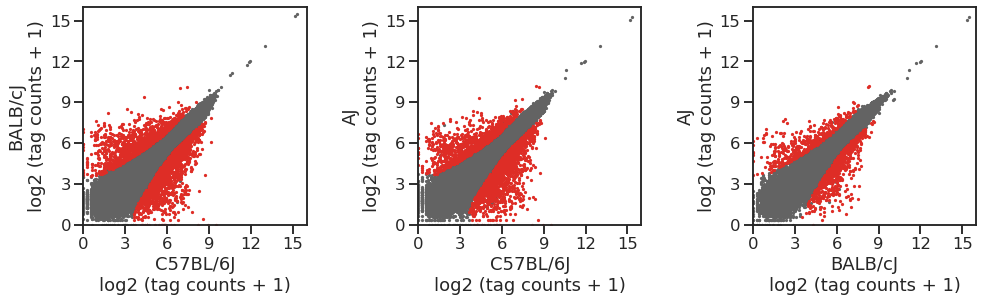

In [17]:
fig, axs = plt.subplots(1,3, figsize=(16,4))
plt.subplots_adjust(wspace=0.5)

for key, col, group, labs, color, ax in zip(comps, cols, groups, labels, colors, axs.reshape(-1)):

    
    de = comp_dict[key]
    de['logtpm'] = np.log2(peak_mat.iloc[:, col].mean(1)+1)
    de['log10p'] = -np.log10(de.adj_pval + 10**(-50))
    de['g0_mean'] = np.log2(peak_mat.iloc[:, group[0]].mean(1)+1)
    de['g1_mean'] = np.log2(peak_mat.iloc[:, group[1]].mean(1)+1)
       
    # plot group by group scatter:
    de_nonsig = de.reindex(de.index[de.adj_pval >= pthresh])
    de_sig_fc1 = de.reindex(de.index[(de.adj_pval < pthresh) & (np.abs(de.log2fc) >= lfcthresh[0])])
    
    # check number of peaks in each group
    print(de_nonsig.shape[0], 'peaks')
    print((de_sig_fc1.log2fc > lfcthresh[0]).sum(), 'peaks up in group 1')
    print((de_sig_fc1.log2fc < -lfcthresh[0]).sum(), 'peaks up in group 2')
    
    for df, c in zip([de_nonsig, de_sig_fc1],
                     color):
        ax.scatter(
            x=df.g0_mean,
            y=df.g1_mean,
            c=c,
            s=dotsize,
            rasterized=True)
     
    # set axis labels
    ax.set_xlabel(labs[0])
    ax.set_ylabel(labs[1])
    
    #set max and min
    ax.set_xlim([0,ax_max])
    ax.set_ylim([0,ax_max])
    
    # set ticks
    ax.set_xticks(np.arange(0,ax_max,ytickstep))
    ax.set_xticklabels(np.arange(0,ax_max,ytickstep))
    ax.set_yticks(np.arange(0,ax_max,ytickstep))
    ax.set_yticklabels(np.arange(0,ax_max,ytickstep))
    
    
plt.savefig('./fancy_figures/'+filename, bbox_inches='tight')
# plt.close()